In [1]:
import pandas as pd

In [2]:
cdf = pd.read_csv('mach_learn_df.csv')

cdf = cdf.drop(columns=['Unnamed: 0','City'])

In [14]:
cdf

,Hour,Offense_Type,Premise,Tract,Month,Day_of_Week,Temperature,Weather
0,0,Burglary/Robbery,Residence or House,313100,1,Monday,46.56,Clouds
1,0,Burglary/Robbery,Apartment,321300,1,Monday,46.56,Clouds
2,0,Burglary/Robbery,"Road, Street, or Sidewalk",432801,1,Monday,46.56,Clouds
3,0,Assault,"Road, Street, or Sidewalk",330700,1,Monday,46.56,Clouds
4,0,Theft,"Church, Synagogue, or Temple Parking Lot",312800,1,Monday,46.56,Clouds
...,...,...,...,...,...,...,...,...
309954,23,Theft,"Residence, Home (Includes Apartment)",521700,5,Sunday,74.26,Rain
309955,23,Intimidation,"Residence, Home (Includes Apartment)",521200,5,Sunday,74.26,Rain
309956,23,Theft,"Bank, Savings & Loan",521200,5,Sunday,74.26,Rain
309957,23,Intimidation,"Residence, Home (Includes Apartment)",431102,5,Sunday,74.26,Rain


In [4]:
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,cdf,y=None):
        return self # not relevant here

    def transform(self,cdf):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = cdf.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,cdf,y=None):
        return self.fit(cdf,y).transform(cdf)
    
encoded_cdf = MultiColumnLabelEncoder(columns = ['Offense_Type','Day_of_Week', 'Premise', 'Tract', 'Weather']).fit_transform(cdf)

encoded_cdf

,Hour,Offense_Type,Premise,Tract,Month,Day_of_Week,Temperature,Weather
0,0,2,125,156,1,1,46.56,1
1,0,2,9,180,1,1,46.56,1
2,0,2,131,385,1,1,46.56,1
3,0,1,131,204,1,1,46.56,1
4,0,7,33,153,1,1,46.56,1
...,...,...,...,...,...,...,...,...
309954,23,7,126,491,5,3,74.26,6
309955,23,3,126,486,5,3,74.26,6
309956,23,7,18,486,5,3,74.26,6
309957,23,3,126,361,5,3,74.26,6


In [5]:
from sklearn.cluster import KMeans

import numpy as np

cdf_array = encoded_cdf.values
kmeans = KMeans(n_clusters=7, random_state=42, n_jobs=-1).fit(cdf_array)
kmeans.labels_


/Users/ryanashcraft/opt/anaconda3/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:974: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)


array([5, 5, 3, ..., 6, 3, 6], dtype=int32)

In [6]:
print(len(kmeans.labels_))

309959


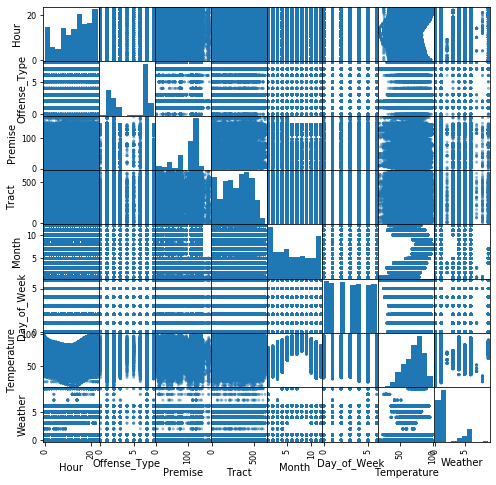

In [15]:
import plotly.express as px
fig = pd.plotting.scatter_matrix(encoded_cdf, figsize=(8,8))

In [12]:
fig.show()

NameError: name 'fig' is not defined

In [7]:
# Predict the clusters
predicted_clusters = kmeans.predict(encoded_cdf[:50])

predicted_clusters

array([5, 5, 3, 0, 5, 0, 3, 3, 3, 2, 1, 2, 2, 0, 0, 2, 6, 2, 5, 5, 5, 0,
       1, 4, 3, 6, 0, 2, 5, 5, 0, 0, 4, 4, 1, 5, 4, 2, 0, 0, 2, 0, 0, 3,
       2, 6, 2, 2, 0, 4], dtype=int32)

In [9]:
predict_comps = cdf.values

result = zip(predict_comps[:50] , predicted_clusters)

sorted_results = sorted(result, key=lambda x: x[1])
sorted_results

[(array([0, 'Assault', 'Road, Street, or Sidewalk', 330700, 1, 'Monday',
         46.56, 'Clouds'], dtype=object), 0),
 (array([0, 'Theft', 'Church, Synagogue, or Temple Parking Lot', 334100, 1,
         'Monday', 46.56, 'Clouds'], dtype=object), 0),
 (array([1, 'Burglary/Robbery', 'Apartment', 333300, 1, 'Monday', 46.4,
         'Clouds'], dtype=object), 0),
 (array([1, 'Theft', 'Church, Synagogue, or Temple Parking Lot', 334100, 1,
         'Monday', 46.4, 'Clouds'], dtype=object), 0),
 (array([2, 'Theft', 'Apartment Parking Lot', 334001, 1, 'Monday', 45.07,
         'Clouds'], dtype=object), 0),
 (array([2, 'Theft', 'Road, Street, or Sidewalk', 330700, 1, 'Monday',
         45.07, 'Clouds'], dtype=object), 0),
 (array([3, 'Burglary/Robbery', 'Apartment', 332700, 1, 'Monday', 43.9,
         'Clouds'], dtype=object), 0),
 (array([3, 'Assault', 'Apartment', 333800, 1, 'Monday', 43.9, 'Clouds'],
        dtype=object), 0),
 (array([5, 'Burglary/Robbery', 'Apartment', 333500, 1, 'Monday',